# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [27]:
# import libraries here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [28]:
# your answer here

# importamos temp_states.csv

temp = pd.read_csv('temp_states.csv')



#### Print `temp`

In [29]:
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [30]:
# your answer here

temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [31]:
# your answer here

# filas donde se encuentra  el valor New York

temp.loc[temp['State'] == 'New York']


,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [32]:
# your answer here

# media de la temperatura en New York

temp.loc[temp['State'] == 'New York'].mean()



C:\Users\luiso\AppData\Local\Temp\ipykernel_15776\2169992338.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp.loc[temp['State'] == 'New York'].mean()


Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [33]:
# your answer here

# encontrar los estados y ciudades con temperaturas mayores a 15 grados

temp.loc[temp['Temperature'] > 15]


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [34]:
# your answer here

# encontrar las ciudades con temperaturas mayores a 15 grados

temp.loc[temp['Temperature'] > 15, 'City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [35]:
# your answer here

# encontrar las ciudades con temperaturas mayores a 15 grados y menores a 20 grados

temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20), 'City']

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [36]:
# your answer here

# encontrar la desviacion estandar y la media de la temperatura de cada estado

temp.groupby('State').agg({'Temperature': ['mean', 'std']})


Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [37]:
# your answer here
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [38]:
# your answer here
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<Axes: title={'center': 'Years'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

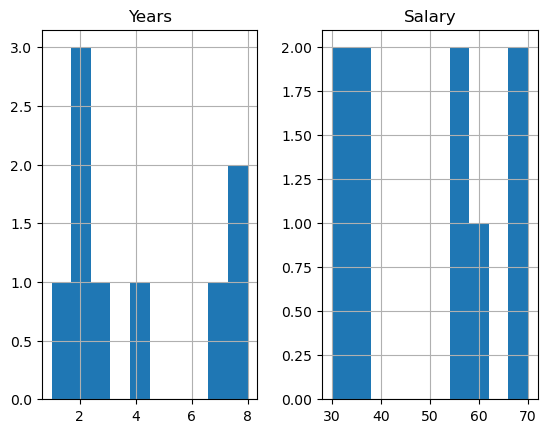

In [39]:
# your answer here

#creamos un histograma del dataframe employee

employee.hist()

#### What's the average salary in this company?

In [40]:
# your answer here

# media del salario

employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [41]:
# your answer here

# salario maximo

employee['Salary'].max()

70

#### What's the lowest salary?

In [42]:
# your answer here
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [43]:
# your answer here

# empleados con menor salario

employee.loc[employee['Salary'] == employee['Salary'].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [44]:
# your answer here
# encontrar al empleado David

employee.loc[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [45]:
# your answer here

# sacar el salario de David

employee.loc[employee['Name'] == 'David', 'Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [46]:
# your answer here

employee.loc[employee['Title'] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [47]:
# your answer here- 1 method


In [48]:
# your answer here- 2nd method


#### Find the employees who's title is associate and the salary above 55?

In [49]:
# your answer here

employee.loc[(employee['Title'] == "associate") & (employee['Salary'] > 55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [77]:
# your answer here

# agrupar empleados por numero de años de experiencia y sacar la media del salario

employee.groupby('Years').agg({'Salary': ['mean']})



,Salary
,mean
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [78]:
# your answer here

employee.groupby('Title').agg({'Salary': ['mean']})

,Salary
,mean
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<Axes: title={'center': 'Salary'}, xlabel='[Title]'>

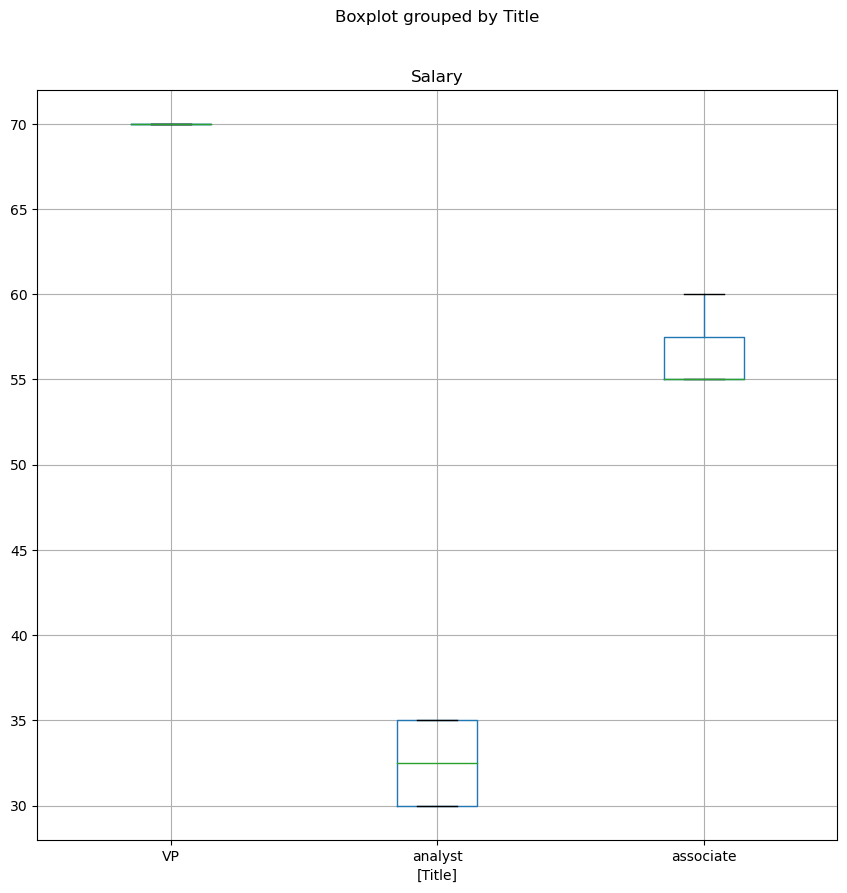

In [79]:
# draw boxplot here

employee.boxplot(column = ['Salary'], by = ['Title'], figsize = (10, 10))

In [82]:
# print first quartile here

employee.loc['Salary'].quantile(0.25)

35.0

In [83]:
# print third quartile here

employee['Salary'].quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [88]:
# your answer here


employee.groupby('Gender').agg({'Salary': ['mean']})



,Salary
,mean
Gender,
F,47.5
M,50.0


In [86]:
employee['Salary'].quantile(0.25)

35.0

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [56]:
# your answer here



### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [57]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [58]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [59]:
# your answer here

In [60]:
# your answer here

####  What is the average Purchase Price?

In [61]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [62]:
# your answer here

In [63]:
# your answer here

#### Select all the customers we have in Spain

In [64]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [65]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [66]:
# your answer here

#### Select orders from Spain that are above 50 items

In [67]:
# your answer here

#### Select all free orders

In [68]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [69]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [70]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [71]:
# your answer here

#### Select all orders made in the month of August

In [72]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [73]:
# your answer here

#### What's the  average amount of money spent by country

In [74]:
# your answer here

#### What's the most expensive item?

In [75]:
# your answer here

#### What was the average amount spent per year ?

In [76]:
# your answer here